# Dataset exploration -- choosing a dataset for individual project

### OTC Stocks - possible Individual Project

- Can we predict whether an Over-the-Counter stock will go up or down?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prep

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)


In [2]:
df = pd.read_csv('otc_0422_2022.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         227 non-null    object 
 1   Security Name  227 non-null    object 
 2   Tier           227 non-null    object 
 3   Price          227 non-null    float64
 4   Change %       227 non-null    float64
 5   Vol            227 non-null    int64  
 6   Sec Type       227 non-null    object 
 7   Country        227 non-null    object 
 8   State          227 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 16.1+ KB


,Symbol,Security Name,Tier,Price,Change %,Vol,Sec Type,Country,State
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,USA,Georgia
1,UMAX,UMAX GROUP CORP,Pink Current,0.10625,90.5830,3515721,Common Stock,USA,California
2,TMMI,TMM INC,Pink Current,0.02150,45.2703,1288183,Common Stock,USA,South Carolina
3,EVIO,EVIO INC,Pink Limited,0.00020,42.8571,39359200,Common Stock,USA,Nevada
4,LCLP,LIFE CLIPS INC,Pink Current,0.01110,42.3077,167230887,Common Stock,USA,Florida


In [3]:
df.describe()

,Price,Change %,Vol
count,227.000000,227.000000,2.270000e+02
mean,0.009488,0.269011,2.623386e+07
std,0.026654,15.071536,6.473187e+07
min,0.000100,-33.333300,1.008063e+06
25%,0.000800,-7.089950,2.733142e+06
50%,0.002200,0.000000,7.321837e+06
75%,0.007450,4.057050,2.467004e+07
max,0.301200,100.000000,6.900678e+08


In [4]:
df = df.rename(columns= {
    'Symbol': 'symbol',
    'Security Name': 'sec_name',
    'Tier': 'tier',
    'Price': 'price',
    'Change %': 'change_pct',
    'Vol': 'vol',
    'Sec Type': 'sec_type',
    'Country': 'country',
    'State': 'state'

})

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      227 non-null    object 
 1   sec_name    227 non-null    object 
 2   tier        227 non-null    object 
 3   price       227 non-null    float64
 4   change_pct  227 non-null    float64
 5   vol         227 non-null    int64  
 6   sec_type    227 non-null    object 
 7   country     227 non-null    object 
 8   state       227 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 16.1+ KB


,symbol,sec_name,tier,price,change_pct,vol,sec_type,country,state
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,USA,Georgia
1,UMAX,UMAX GROUP CORP,Pink Current,0.10625,90.5830,3515721,Common Stock,USA,California
2,TMMI,TMM INC,Pink Current,0.02150,45.2703,1288183,Common Stock,USA,South Carolina
3,EVIO,EVIO INC,Pink Limited,0.00020,42.8571,39359200,Common Stock,USA,Nevada
4,LCLP,LIFE CLIPS INC,Pink Current,0.01110,42.3077,167230887,Common Stock,USA,Florida


In [5]:
#Dropping country column because USA was preselected in data download
df = df.drop(columns= ['country'])

df.head()

,symbol,sec_name,tier,price,change_pct,vol,sec_type,state
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,Georgia
1,UMAX,UMAX GROUP CORP,Pink Current,0.10625,90.5830,3515721,Common Stock,California
2,TMMI,TMM INC,Pink Current,0.02150,45.2703,1288183,Common Stock,South Carolina
3,EVIO,EVIO INC,Pink Limited,0.00020,42.8571,39359200,Common Stock,Nevada
4,LCLP,LIFE CLIPS INC,Pink Current,0.01110,42.3077,167230887,Common Stock,Florida


In [6]:
df.tier.value_counts()

Pink Current    198
Pink Limited     29
Name: tier, dtype: int64

In [7]:
df.sec_type.value_counts()

Common Stock               224
Foreign Ordinary Shares      3
Name: sec_type, dtype: int64

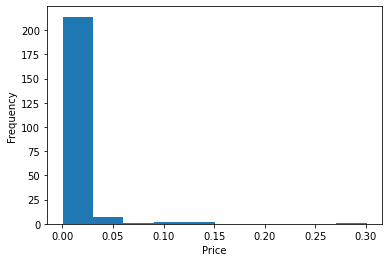

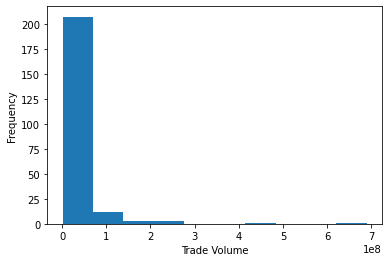

Text(0.5, 0, 'Price Change Percentage')

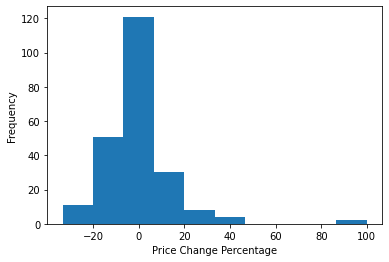

In [18]:
df.price.plot.hist()
plt.xlabel('Price')
plt.show()
df.vol.plot.hist()
plt.xlabel('Trade Volume')
plt.show()
df.change_pct.plot.hist()
plt.xlabel('Price Change Percentage')

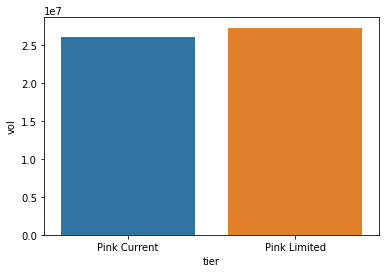

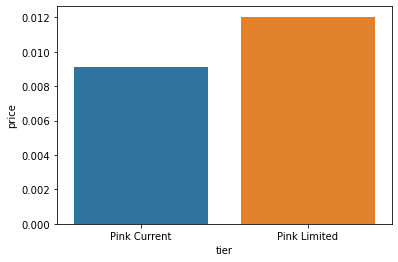

<AxesSubplot:xlabel='tier', ylabel='change_pct'>

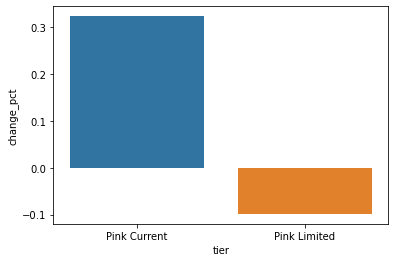

In [11]:
sns.barplot(data= df, x='tier', y='vol', ci=None)
plt.show()
sns.barplot(data= df, x='tier', y='price', ci=None)
plt.show()
sns.barplot(data= df, x='tier', y='change_pct', ci=None)

In [8]:
df.describe()

,price,change_pct,vol
count,227.000000,227.000000,2.270000e+02
mean,0.009488,0.269011,2.623386e+07
std,0.026654,15.071536,6.473187e+07
min,0.000100,-33.333300,1.008063e+06
25%,0.000800,-7.089950,2.733142e+06
50%,0.002200,0.000000,7.321837e+06
75%,0.007450,4.057050,2.467004e+07
max,0.301200,100.000000,6.900678e+08


In [9]:
symbols = df.symbol.to_list()
symbols

['HVCW',
 'UMAX',
 'TMMI',
 'EVIO',
 'LCLP',
 'GFTX',
 'AFOM',
 'EEGI',
 'TSPG',
 'HCMC',
 'BYOC',
 'PSWW',
 'TXTM',
 'PDPG',
 'ATYG',
 'PTOP',
 'HQGE',
 'TONR',
 'BLDV',
 'GSFI',
 'GRST',
 'EESO',
 'VPER',
 'NBRI',
 'LGBS',
 'ALKM',
 'DRNK',
 'HMLA',
 'MWWC',
 'CSLI',
 'CIVX',
 'SBES',
 'INCC',
 'GTXO',
 'FBCD',
 'CATV',
 'MAPT',
 'BBBT',
 'MMMM',
 'XFLS',
 'INKW',
 'PCLI',
 'PPJE',
 'GXXM',
 'AXXA',
 'PAOG',
 'GRCU',
 'IDVV',
 'SPRV',
 'WDLF',
 'CBGL',
 'TSOI',
 'ATIG',
 'PRDL',
 'HIRU',
 'MLFB',
 'SHOM',
 'LVVV',
 'ITOX',
 'PVSP',
 'IFXY',
 'ERBB',
 'MJNA',
 'UATG',
 'NEWH',
 'KATX',
 'INTK',
 'OWUV',
 'VDRM',
 'BYRG',
 'BTDG',
 'NSPT',
 'PLPL',
 'DUTV',
 'GTLL',
 'SNMN',
 'UAMM',
 'PRPM',
 'TGRO',
 'ICTY',
 'SMCE',
 'VGLS',
 'PBHG',
 'CBYI',
 'NPHC',
 'GBHL',
 'BLLB',
 'GNCP',
 'BIEL',
 'AUNXF',
 'VNUE',
 'VAYK',
 'NECA',
 'CBDL',
 'GMEV',
 'GRLT',
 'CHNC',
 'BRGO',
 'CGAC',
 'MAXD',
 'XTRM',
 'AAGC',
 'MCOA',
 'ECEZ',
 'NNRX',
 'SPRJ',
 'PBYA',
 'GTEH',
 'FTXP',
 'OPTI',
 'VXIT',


In [20]:
train, validate, test = prep.get_splits(df)

print(train.shape, validate.shape, test.shape)

(126, 8) (55, 8) (46, 8)


In [23]:
train.info()
train.sample(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 111 to 33
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      126 non-null    object 
 1   sec_name    126 non-null    object 
 2   tier        126 non-null    object 
 3   price       126 non-null    float64
 4   change_pct  126 non-null    float64
 5   vol         126 non-null    int64  
 6   sec_type    126 non-null    object 
 7   state       126 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.9+ KB


,symbol,sec_name,tier,price,change_pct,vol,sec_type,state
18,BLDV,BLUE DIAMOND VENTURES INC,Pink Limited,0.00130,18.1818,2966733,Common Stock,Illinois
74,GTLL,GLOBAL TECHS LTD,Pink Current,0.00030,0.0000,140153657,Common Stock,Florida
114,JAMN,JAMMIN JAVA CORP,Pink Limited,0.00010,0.0000,23706304,Common Stock,Nevada
187,RDAR,RAADR INC,Pink Current,0.00045,-10.0000,9399620,Common Stock,Arizona
61,ERBB,AMERICAN GREEN INC,Pink Current,0.00350,2.9412,8766351,Common Stock,Arizona
43,GXXM,GEX MGMT INC,Pink Limited,0.00640,6.6667,9595371,Common Stock,Texas
51,TSOI,THERAPEUTIC SLTNS INTL,Pink Current,0.02830,4.8148,5526489,Common Stock,Idaho
0,HVCW,HARRISON VICKERS&WATERMEL,Pink Current,0.00020,100.0000,10000000,Common Stock,Georgia
156,AMBS,AMARANTUS BIOSCIENCE HLDG,Pink Current,0.00450,-5.4622,1210034,Common Stock,New York
29,CSLI,CRITICAL SOLUTIONS INC,Pink Current,0.00430,13.1579,6823972,Common Stock,Wyoming


Text(0.5, 1.0, 'Price vs Percent change')

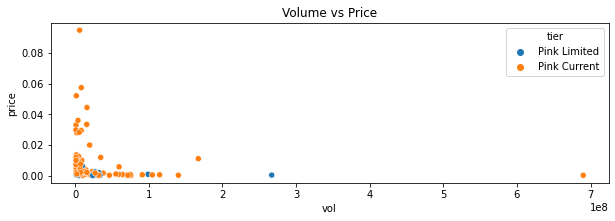

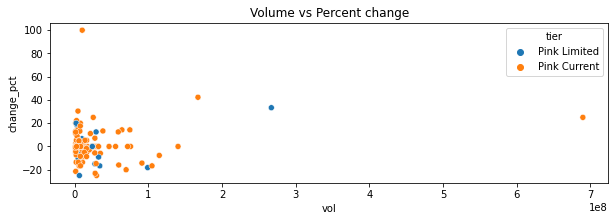

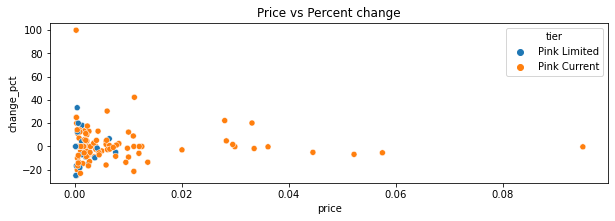

In [29]:
plt.figure(figsize=(10,10))

plt.subplot(311)
sns.scatterplot(data= train, x='vol', y='price', hue='tier')
plt.title('Volume vs Price')

plt.figure(figsize=(10,10))
plt.subplot(312)
sns.scatterplot(data= train, x='vol', y='change_pct', hue='tier')
plt.title('Volume vs Percent change')

plt.figure(figsize=(10,10))
plt.subplot(313)
sns.scatterplot(data= train, x='price', y='change_pct', hue='tier')
plt.title('Price vs Percent change')

### There are not enough features in this dataset to draw anything meaningful out of it.

In [15]:
import requests
import re
import urllib.request as ur


In [30]:
wheat_importers = pd.read_excel('GTRTable15.xlsx')
wheat_importers.info()
wheat_importers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   0 non-null      float64
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   0 non-null      float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  1 non-null      object 
dtypes: float64(12), object(2)
memory usage: 2.2+ KB


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ^^^Convoluted excel spreadsheet. Data offers little potential for exploratory analysis.^^^

# World Bank Development Indicator dataset

In [2]:
world_dev_ind = pd.read_csv('WDIData.csv')

world_dev_ind.info()
world_dev_ind.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383838 entries, 0 to 383837
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    383838 non-null  object 
 1   Country Code    383838 non-null  object 
 2   Indicator Name  383838 non-null  object 
 3   Indicator Code  383838 non-null  object 
 4   1960            37306 non-null   float64
 5   1961            42355 non-null   float64
 6   1962            44599 non-null   float64
 7   1963            44449 non-null   float64
 8   1964            44990 non-null   float64
 9   1965            47183 non-null   float64
 10  1966            47213 non-null   float64
 11  1967            48962 non-null   float64
 12  1968            48544 non-null   float64
 13  1969            50390 non-null   float64
 14  1970            69081 non-null   float64
 15  1971            76036 non-null   float64
 16  1972            79137 non-null   float64
 17  1973      

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.469146,11.836171,12.153818,12.566328,12.963729,13.429404,13.866013,14.309472,14.773776,15.241222,15.658101,16.097824,16.511262,16.966046,17.411737,17.808234,18.179760,18.558937,18.949636,19.333168,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.086007,23.103178,24.223430,25.023184,26.176336,23.621498,27.299433,28.737952,28.813735,27.483061,28.233373,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.491610,13.201875,15.209347,13.813535,15.423615,10.958840,16.762469,14.417102,16.977975,18.173341,16.241064,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban population)",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.083452,54.770123,56.102330,57.094310,57.836866,58.953365,59.546975,59.598959,60.983400,61.227255,62.520824,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution or with a mobile-money-service provider (...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
world_dev_ind['Indicator Name'].value_counts().sort_values(ascending=False)

Access to clean fuels and technologies for cooking (% of population)                                                       266
Adjusted net national income (constant 2015 US$)                                                                           266
Access to electricity, urban (% of urban population)                                                                       266
Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)            266
Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)    266
                                                                                                                          ... 
Women who were first married by age 15 (% of women ages 20-24)                                                             266
Women who were first married by age 18 (% of women ages 20-24)                                                 

In [2]:
from wrangle import col_null_analysis, row_null_analysis

#col_nulls = col_null_analysis(world_dev_ind)

#col_nulls

In [11]:
ind_row_nulls = row_null_analysis(world_dev_ind)

ind_row_nulls

,row_null_count,row_null_pct
0,43,64.179104
1,43,64.179104
2,43,64.179104
3,43,64.179104
4,63,94.029851
...,...,...
383833,59,88.059701
383834,56,83.582090
383835,54,80.597015
383836,32,47.761194


In [4]:
world_dev_countries = pd.read_csv('WDICountry.csv')

world_dev_countries.info()
world_dev_countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       265 non-null    object 
 1   Short Name                                         265 non-null    object 
 2   Table Name                                         265 non-null    object 
 3   Long Name                                          265 non-null    object 
 4   2-alpha code                                       263 non-null    object 
 5   Currency Unit                                      217 non-null    object 
 6   Special Notes                                      123 non-null    object 
 7   Region                                             217 non-null    object 
 8   Income Group                                       216 non-null    object 
 9   WB-2 code 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology,NaN,NaN,BPM6,NaN,General trade system,NaN,Enhanced General Data Dissemination System (e-GDDS),2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in the North to the Cape of Good Hope in the...",NaN,NaN,ZH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,The reporting period for national accounts data is designated as either calendar year ...,South Asia,Low income,AF,2016,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology,NaN,NaN,BPM6,Actual,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost point of Africa, across the equator, and...",NaN,NaN,ZI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,2002,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology,NaN,NaN,BPM6,Actual,General trade system,Budgetary central government,Enhanced General Data Dissemination System (e-GDDS),2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [10]:
world_dev_countries['Income Group'].value_counts()

High income            79
Lower middle income    55
Upper middle income    55
Low income             27
Name: Income Group, dtype: int64

In [5]:
wdi_country_series = pd.read_csv('WDICountry-Series.csv')
wdi_country_series.info()
wdi_country_series.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  8013 non-null   object 
 1   SeriesCode   8013 non-null   object 
 2   DESCRIPTION  8013 non-null   object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 250.5+ KB


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,IT.MLT.MAIN,Servicio di Telecomunicacion di Aruba (SETAR). Directorate of Telecommunication Affair...,NaN
1,ABW,ST.INT.ARVL,Includes overnight visitors (tourists) and same-day visitors (excursionists). Arrivals...,NaN
2,ABW,SP.DYN.CBRT.IN,Data source: United Nations World Population Prospects,NaN
3,ABW,ST.INT.XPND.CD,Compiled from data reported in the International Monetary Fund's Balance of Payment St...,NaN
4,ABW,IT.NET.BBND.P2,Servicio di Telecomunicacion di Aruba (SETAR). Directorate of Telecommunication Affair...,NaN


In [6]:
wdi_series = pd.read_csv('WDISeries.csv')
wdi_series.info()
wdi_series.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          1443 non-null   object 
 1   Topic                                1443 non-null   object 
 2   Indicator Name                       1443 non-null   object 
 3   Short definition                     192 non-null    object 
 4   Long definition                      1435 non-null   object 
 5   Unit of measure                      25 non-null     object 
 6   Periodicity                          1421 non-null   object 
 7   Base Period                          73 non-null     object 
 8   Other notes                          5 non-null      object 
 9   Aggregation method                   1045 non-null   object 
 10  Limitations and exceptions           839 non-null    object 
 11  Notes from original source    

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of wheel and crawler tractors (excluding g...,NaN,Annual,NaN,NaN,Sum,The data are collected by the Food and Agriculture Organization of the United Nations ...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","A tractor provides the power and traction to mechanize agricultural tasks, especially ...",Agricultural land covers more than one-third of the world's land area. In many industr...,NaN,NaN,NaN,CC BY-4.0,NaN
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer production),NaN,Fertilizer consumption measures the quantity of plant nutrients used per unit of arabl...,NaN,Annual,NaN,NaN,Weighted average,The FAO has revised the time series for fertilizer consumption and irrigation for 2002...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Fertilizer consumption measures the quantity of plant nutrients, and is calculated as ...","Factors such as the green revolution, has led to impressive progress in increasing cro...",NaN,NaN,NaN,CC BY-4.0,NaN
2,AG.CON.FERT.ZS,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare of arable land),NaN,Fertilizer consumption measures the quantity of plant nutrients used per unit of arabl...,NaN,Annual,NaN,NaN,Weighted average,The FAO has revised the time series for fertilizer consumption and irrigation for 2002...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Fertilizer consumption measures the quantity of plant nutrients, and is calculated as ...","Factors such as the green revolution, has led to impressive progress in increasing cro...",NaN,NaN,NaN,CC BY-4.0,NaN
3,AG.LND.AGRI.K2,Environment: Land use,Agricultural land (sq. km),NaN,"Agricultural land refers to the share of land area that is arable, under permanent cro...",NaN,Annual,NaN,NaN,Sum,The data are collected by the Food and Agriculture Organization of the United Nations ...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Agricultural land constitutes only a part of any country's total area, which can inclu...",Agricultural land covers more than one-third of the world's land area. In many industr...,NaN,NaN,NaN,CC BY-4.0,NaN
4,AG.LND.AGRI.ZS,Environment: Land use,Agricultural land (% of land area),NaN,"Agricultural land refers to the share of land area that is arable, under permanent cro...",NaN,Annual,NaN,NaN,Weighted average,The data are collected by the Food and Agriculture Organization of the United Nations ...,NaN,NaN,"Food and Agriculture Organization, electronic files and web site.","Agriculture is still a major sector in many economies, and agricultural activities pro...","Agricultural land covers more than one-third of the world's land area, with arable lan...",NaN,NaN,NaN,CC BY-4.0,NaN


In [7]:
wdi_st = pd.read_csv('WDISeries-Time.csv')
wdi_st.info()
wdi_st.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesCode   501 non-null    object 
 1   Year         501 non-null    object 
 2   DESCRIPTION  501 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


,SeriesCode,Year,DESCRIPTION,Unnamed: 3
0,SP.DYN.AMRT.FE,YR1960,"Interpolated using data for 1957 and 1962, if the data source is United Nations World ...",NaN
1,SP.DYN.TO65.MA.ZS,YR1960,Interpolated using data for 1957 and 1962.,NaN
2,SP.DYN.TO65.FE.ZS,YR1960,Interpolated using data for 1957 and 1962.,NaN
3,SP.ADO.TFRT,YR1960,Interpolated using data for 1957 and 1962.,NaN
4,SP.DYN.AMRT.MA,YR1960,"Interpolated using data for 1957 and 1962, if the data source is United Nations World ...",NaN


In [8]:
wdi_st.Year.value_counts()

YR2000        25
YR2010        22
YR1990        20
YR2017        19
YR2020        18
YR2018        13
YR2016        12
YR2002        11
YR2003        11
YR2004        11
YR2005        11
YR2006        11
YR2007        11
YR2012        11
YR2011         7
YR2013         7
YR1962         7
YR1992         7
YR2002         7
YR1967         7
YR2015         7
YR1987         7
YR1972         7
YR1997         7
YR1982         7
YR2007         7
YR1977         7
YR2014         6
YR2008         6
YR2019         6
YR2009         6
YR2005         5
YR2006         5
YR2003         5
YR1998         5
YR2001         5
YR1999         5
YR2004         5
YR1960         5
YR1996         5
YR1995         5
YR1963         5
YR1964         5
YR1965         5
YR1966         5
YR1968         5
YR1969         5
YR1970         5
YR1971         5
YR1973         5
YR1974         5
YR1975         5
YR1976         5
YR1978         5
YR1979         5
YR1980         5
YR1981         5
YR1983         5
YR1984        

### World Bank Development Indicator dataset is a strong candidate. It will take some work to clean, though.

# Nifty 100 Index dataset

In [8]:
nifty_df = pd.read_csv('Nifty_100.csv')

nifty_df.info()
nifty_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276568 entries, 0 to 276567
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    276568 non-null  object 
 1   Time    276568 non-null  object 
 2   Open    276568 non-null  float64
 3   High    276568 non-null  float64
 4   Low     276568 non-null  float64
 5   Close   276568 non-null  float64
dtypes: float64(4), object(2)
memory usage: 12.7+ MB


,Date,Time,Open,High,Low,Close
0,02/01/2017,09:07:59,8409.6,8409.6,8409.6,8409.6
1,02/01/2017,09:08:59,8409.6,8409.6,8409.6,8409.6
2,02/01/2017,09:09:59,8409.6,8409.6,8409.6,8409.6
3,02/01/2017,09:10:59,8409.6,8409.6,8409.6,8409.6
4,02/01/2017,09:11:59,8409.6,8409.6,8409.6,8409.6


In [3]:
nifty_df.describe()

,Open,High,Low,Close
count,276568.000000,276568.000000,276568.000000,276568.000000
mean,10854.305947,10855.938662,10852.626565,10854.252050
std,850.887604,851.089535,850.705353,850.901303
min,8339.700000,8340.300000,8337.200000,8339.900000
25%,10431.200000,10432.050000,10429.400000,10431.200000
50%,10956.600000,10958.550000,10954.750000,10956.600000
75%,11461.150000,11463.700000,11459.012500,11461.050000
max,12385.950000,12387.300000,12384.450000,12385.500000


### Only continuous variables and a time element. No categorical elements.

<Figure size 864x576 with 0 Axes>

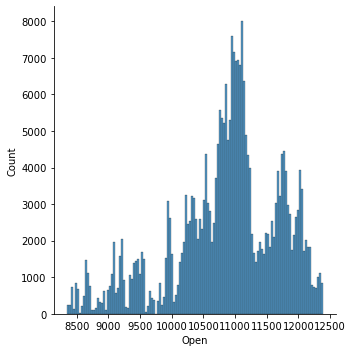

<Figure size 864x576 with 0 Axes>

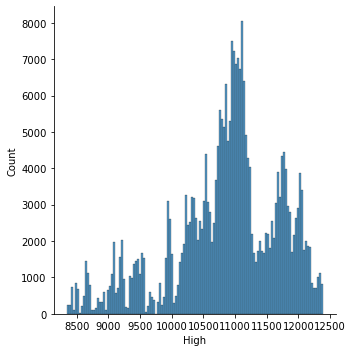

<Figure size 864x576 with 0 Axes>

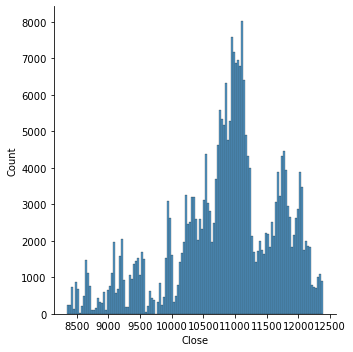

<Figure size 864x576 with 0 Axes>

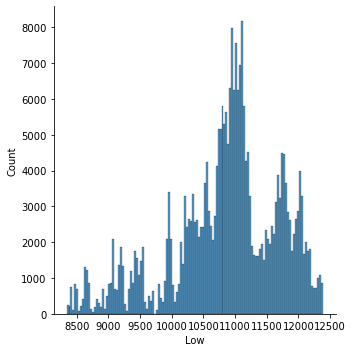

In [9]:
# Plot distributions
plt.figure(figsize=(12,8))
sns.displot(data= nifty_df, x='Open')
plt.show()
plt.figure(figsize=(12,8))
sns.displot(data= nifty_df, x='High')
plt.show()
plt.figure(figsize=(12,8))
sns.displot(data= nifty_df, x='Close')
plt.show()
plt.figure(figsize=(12,8))
sns.displot(data= nifty_df, x='Low')

In [10]:
nifty_df['timestamp'] = nifty_df.Date + ' ' + nifty_df.Time

nifty_df.info()
nifty_df.head()
nifty_df.timestamp = pd.to_datetime(nifty_df.timestamp)
nifty_df = nifty_df.set_index(nifty_df.timestamp)
nifty_df = nifty_df.drop(columns= ['Date', 'Time'])
nifty_df = nifty_df.rename (columns= {'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close'})
nifty_df.info()
nifty_df.head()
nifty_df = nifty_df.drop(columns= ['timestamp'])
nifty_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276568 entries, 0 to 276567
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       276568 non-null  object 
 1   Time       276568 non-null  object 
 2   Open       276568 non-null  float64
 3   High       276568 non-null  float64
 4   Low        276568 non-null  float64
 5   Close      276568 non-null  float64
 6   timestamp  276568 non-null  object 
dtypes: float64(4), object(3)
memory usage: 14.8+ MB


,Date,Time,Open,High,Low,Close,timestamp
0,02/01/2017,09:07:59,8409.6,8409.6,8409.6,8409.6,02/01/2017 09:07:59
1,02/01/2017,09:08:59,8409.6,8409.6,8409.6,8409.6,02/01/2017 09:08:59
2,02/01/2017,09:09:59,8409.6,8409.6,8409.6,8409.6,02/01/2017 09:09:59
3,02/01/2017,09:10:59,8409.6,8409.6,8409.6,8409.6,02/01/2017 09:10:59
4,02/01/2017,09:11:59,8409.6,8409.6,8409.6,8409.6,02/01/2017 09:11:59


### Dataframe is clean, with a datetime index. Visualize data with time series resampling methods.

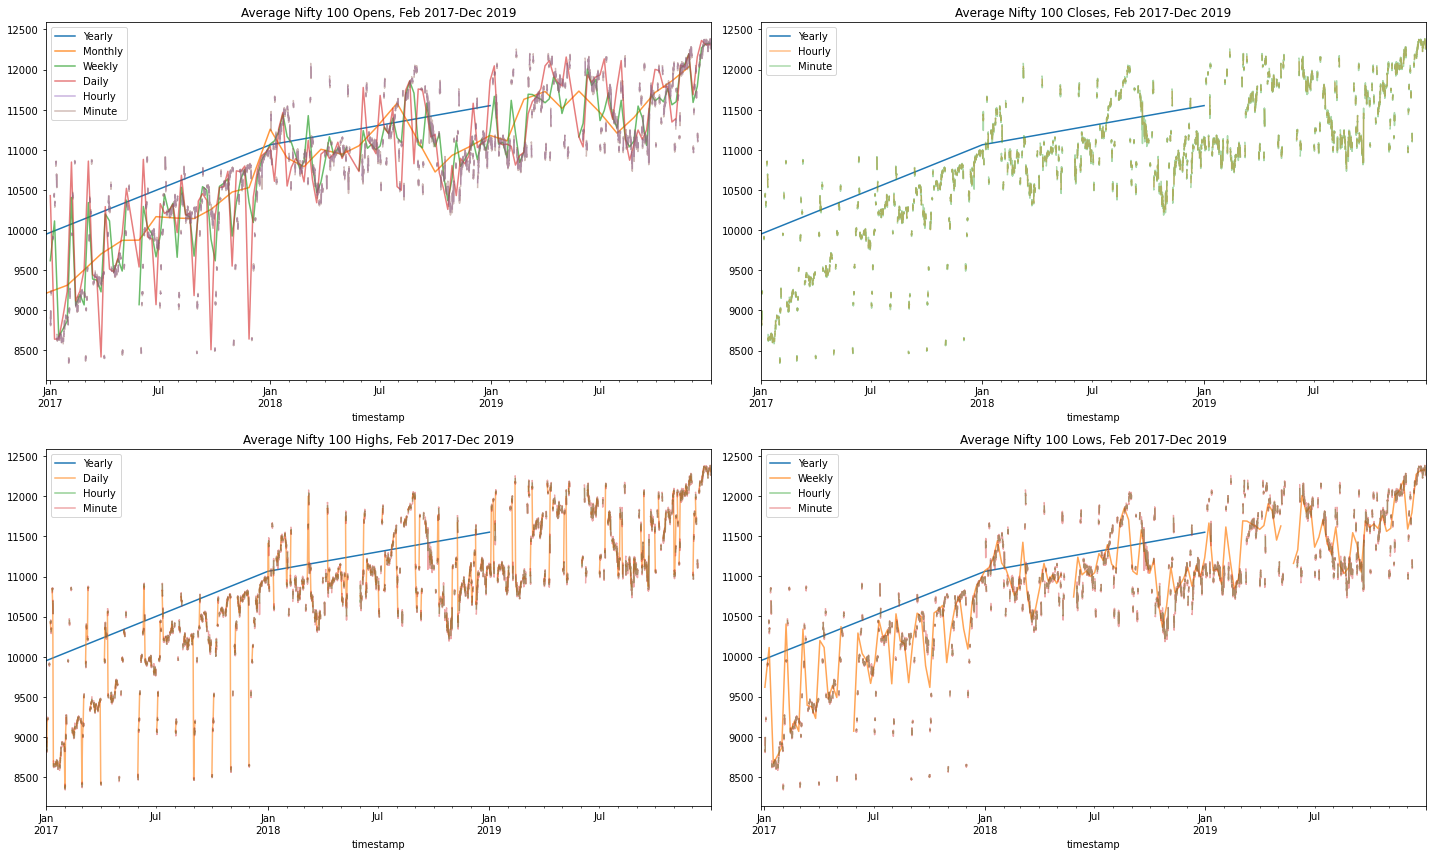

In [16]:
#plot variables resampled by year, month, week, day, hour and minute
plt.figure(figsize=(20,12))

plt.subplot(221)
nifty_df.resample('Y').open.mean().plot(label='Yearly')
nifty_df.resample('M').open.mean().plot(alpha=.8, label='Monthly')
nifty_df.resample('W').open.mean().plot(alpha=.7, label='Weekly')
nifty_df.resample('D').open.mean().plot(alpha=.6, label='Daily')
nifty_df.resample('H').open.mean().plot(alpha=.5, label='Hourly')
nifty_df.resample('T').open.mean().plot(alpha=.4, label='Minute')

plt.title('Average Nifty 100 Opens, Feb 2017-Dec 2019')
plt.legend()

plt.subplot(222)
nifty_df.resample('Y').close.mean().plot(label='Yearly')
#nifty_df.resample('M').close.mean().plot(alpha=.8, label='Monthly')
#nifty_df.resample('W').close.mean().plot(alpha=.7, label='Weekly')
#nifty_df.resample('D').close.mean().plot(alpha=.6, label='Daily')
nifty_df.resample('H').close.mean().plot(alpha=.5, label='Hourly')
nifty_df.resample('T').close.mean().plot(alpha=.4, label='Minute')

plt.title('Average Nifty 100 Closes, Feb 2017-Dec 2019')
plt.legend()

plt.subplot(223)
nifty_df.resample('Y').high.mean().plot(label= 'Yearly')
#nifty_df.resample('M').high.mean().plot(alpha=.8, label='Monthly')
#nifty_df.resample('W').high.mean().plot(alpha=.7, label='Weekly')
nifty_df.resample('D').high.mean().plot(alpha=.6, label='Daily')
nifty_df.resample('H').high.mean().plot(alpha=.5, label='Hourly')
nifty_df.resample('T').high.mean().plot(alpha=.4, label='Minute')

plt.title('Average Nifty 100 Highs, Feb 2017-Dec 2019')
plt.legend()

plt.subplot(224)
nifty_df.resample('Y').low.mean().plot(label='Yearly')
#nifty_df.resample('M').low.mean().plot(alpha=.8, label='Monthly')
nifty_df.resample('W').low.mean().plot(alpha=.7, label='Weekly')
#nifty_df.resample('D').low.mean().plot(alpha=.6, label='Daily')
nifty_df.resample('H').low.mean().plot(alpha=.5, label='Hourly')
nifty_df.resample('T').low.mean().plot(alpha=.4, label='Minute')

plt.title('Average Nifty 100 Lows, Feb 2017-Dec 2019')
plt.legend()

plt.tight_layout()



### Graphs for each variable's average (resampled at year, month, week, day, and hour) look virtually the same, side by side. YOY line seems like it will be close to the best fit.

In [21]:
nifty_df['mean_line']= (nifty_df.high + nifty_df.low) / 2
nifty_df.head()

,open,high,low,close,mean_line
timestamp,,,,,
2017-02-01 09:07:59,8409.6,8409.6,8409.6,8409.6,8409.6
2017-02-01 09:08:59,8409.6,8409.6,8409.6,8409.6,8409.6
2017-02-01 09:09:59,8409.6,8409.6,8409.6,8409.6,8409.6
2017-02-01 09:10:59,8409.6,8409.6,8409.6,8409.6,8409.6
2017-02-01 09:11:59,8409.6,8409.6,8409.6,8409.6,8409.6


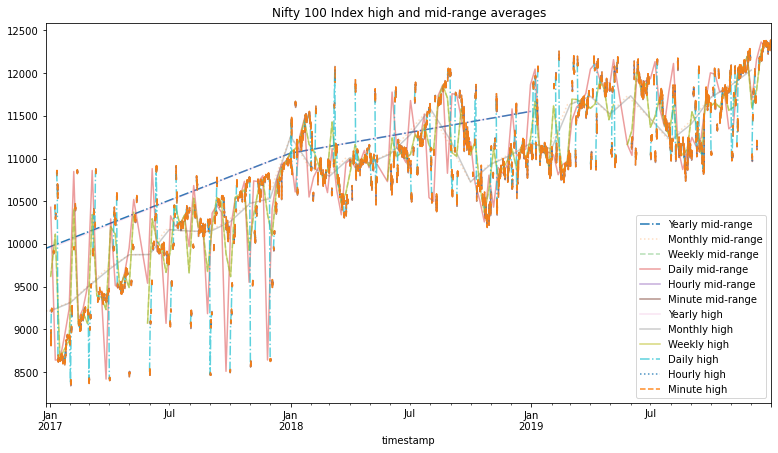

In [24]:
plt.figure(figsize=(13,7))
nifty_df.resample('Y').mean_line.mean().plot(label='Yearly mid-range', ls= '-.')
nifty_df.resample('M').mean_line.mean().plot(alpha=.25, label='Monthly mid-range', ls=':')
nifty_df.resample('W').mean_line.mean().plot(alpha=.35, label='Weekly mid-range', ls='--')
nifty_df.resample('D').mean_line.mean().plot(alpha=.45, label='Daily mid-range')
nifty_df.resample('H').mean_line.mean().plot(alpha=.55, label='Hourly mid-range')
nifty_df.resample('T').mean_line.mean().plot(alpha=.65, label='Minute mid-range')

nifty_df.resample('Y').high.mean().plot(alpha=.2, label='Yearly high')
nifty_df.resample('M').high.mean().plot(alpha=.4, label='Monthly high')
nifty_df.resample('W').high.mean().plot(alpha=.6, label='Weekly high')
nifty_df.resample('D').high.mean().plot(alpha=.7, label='Daily high', ls='-.')
nifty_df.resample('H').high.mean().plot(alpha=.8, label='Hourly high', ls=':')
nifty_df.resample('T').high.mean().plot(alpha=.9, label='Minute high', ls='--')
plt.title('Nifty 100 Index high and mid-range averages')
plt.legend()

### Bivariate analysis & modeling

In [25]:
# Prepare to make splits
train_size = round(len(nifty_df) * .5)
validate_size = round(len(nifty_df) * .3)
test_size= len(nifty_df) - train_size - validate_size
val_end_idx = train_size + validate_size

# Make splits
train = nifty_df[:train_size]
validate = nifty_df[train_size:val_end_idx]
test = nifty_df[val_end_idx:]

train.size + validate.size + test.size == nifty_df.size


True

In [29]:
train.columns

Index(['open', 'high', 'low', 'close', 'mean_line'], dtype='object')

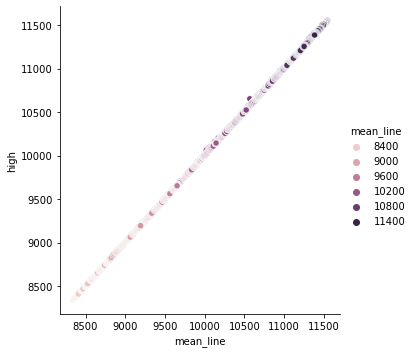

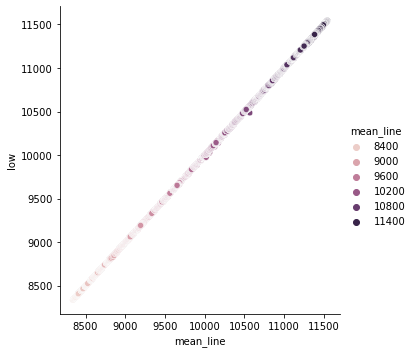

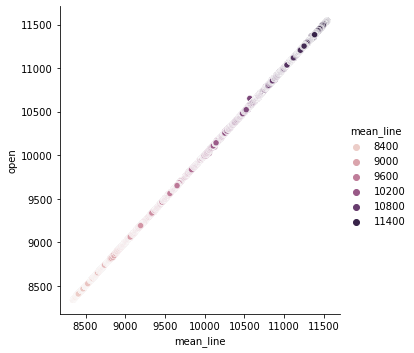

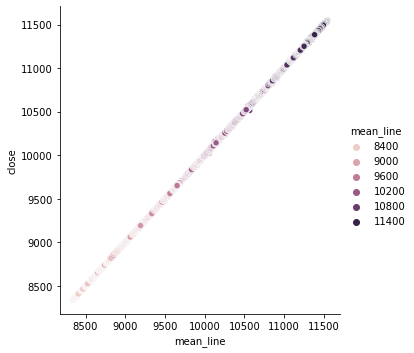

In [31]:
sns.relplot(data= train, x='mean_line', y='high', hue='mean_line')
plt.show()
sns.relplot(data= train, x='mean_line', y='low', hue='mean_line')
plt.show()
sns.relplot(data= train, x='mean_line', y='open', hue='mean_line')
plt.show()
sns.relplot(data= train, x='mean_line', y='close', hue='mean_line')

Are there linear relationships with any of the combinations of the variables open, close, high, low, or mean_line?

$H_0:$ There is no relationship between x and y (where x and y are variables in the train split).

$H_a:$ A relationship does exist between x and y.

In [36]:
from scipy import stats

alpha= .05

r_coeff, pval = stats.pearsonr(train.open, train.mean_line)

if pval < alpha:
    print(f'We can reject the null hypothesis with a confidence level of {1 - pval:.3%}\nCorrelation strength:{r_coeff:.3f}')
else:
    print(f'We fail to reject the null hypothesis. Our confidence level was {1 - pval:.3%}, which is less than our standard of {1 - alpha:.3%}\nCorrelation strength: {r_coeff:.3f}')


r_coeff


We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000


0.9999981859357312

In [49]:
for col in train.columns:
    alpha= .05

    r_coeff, pval = stats.pearsonr(train[col], train.close)

    if pval < alpha:
        print(f'We can reject the null hypothesis with a confidence level of {1 - pval:.3%}\nCorrelation strength:{r_coeff:.3f}')
    else:
        print(f'We fail to reject the null hypothesis. Our confidence level was {1 - pval:.3%}, which is less than our standard of {1 - alpha:.3%}\nCorrelation strength: {r_coeff:.3f}')

We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000


In [50]:
for col in train.columns:
    alpha= .05

    r_coeff, pval = stats.pearsonr(train[col], train.high)

    if pval < alpha:
        print(f'We can reject the null hypothesis with a confidence level of {1 - pval:.3%}\nCorrelation strength:{r_coeff:.3f}')
    else:
        print(f'We fail to reject the null hypothesis. Our confidence level was {1 - pval:.3%}, which is less than our standard of {1 - alpha:.3%}\nCorrelation strength: {r_coeff:.3f}')

We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000


In [51]:
for col in train.columns:
    alpha= .05

    r_coeff, pval = stats.pearsonr(train[col], train.low)

    if pval < alpha:
        print(f'We can reject the null hypothesis with a confidence level of {1 - pval:.3%}\nCorrelation strength:{r_coeff:.3f}')
    else:
        print(f'We fail to reject the null hypothesis. Our confidence level was {1 - pval:.3%}, which is less than our standard of {1 - alpha:.3%}\nCorrelation strength: {r_coeff:.3f}')

We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000


In [52]:
for col in train.columns:
    alpha= .05

    r_coeff, pval = stats.pearsonr(train[col], train.open)

    if pval < alpha:
        print(f'We can reject the null hypothesis with a confidence level of {1 - pval:.3%}\nCorrelation strength:{r_coeff:.3f}')
    else:
        print(f'We fail to reject the null hypothesis. Our confidence level was {1 - pval:.3%}, which is less than our standard of {1 - alpha:.3%}\nCorrelation strength: {r_coeff:.3f}')

We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000


In [53]:
for col in train.columns:
    alpha= .05

    r_coeff, pval = stats.pearsonr(train[col], train.mean_line)

    if pval < alpha:
        print(f'We can reject the null hypothesis with a confidence level of {1 - pval:.3%}\nCorrelation strength:{r_coeff:.3f}')
    else:
        print(f'We fail to reject the null hypothesis. Our confidence level was {1 - pval:.3%}, which is less than our standard of {1 - alpha:.3%}\nCorrelation strength: {r_coeff:.3f}')

We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000
We can reject the null hypothesis with a confidence level of 100.000%
Correlation strength:1.000


### Yes, the variables are linearly related. What does this mean going forward?

### Isolate closing price ('close') as target

- Is closing price predictable?

In [26]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prep.isolate_lm_target(train,validate,test,'close')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138284 entries, 2017-02-01 09:07:59 to 2018-07-13 11:15:59
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   open       138284 non-null  float64
 1   high       138284 non-null  float64
 2   low        138284 non-null  float64
 3   mean_line  138284 non-null  float64
dtypes: float64(4)
memory usage: 5.3 MB


In [41]:
train_scaled, validate_scaled, test_scaled = prep.minmax_scale_data(train, validate, test, train.columns)

train_scaled.head(15)

,open,high,low,close,mean_line
timestamp,,,,,
2017-02-01 09:07:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:08:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:09:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:10:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:11:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:12:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:13:59,0.021784,0.021572,0.022565,0.021723,0.022085
2017-02-01 09:14:59,0.021784,0.022023,0.019293,0.018451,0.020675
2017-02-01 09:15:59,0.018542,0.019097,0.016550,0.016768,0.017838


In [42]:
X_train_scaled = train_scaled.drop(columns= ['close'])

X_train_scaled.head(15)

,open,high,low,mean_line
timestamp,,,,
2017-02-01 09:07:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:08:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:09:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:10:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:11:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:12:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:13:59,0.021784,0.021572,0.022565,0.022085
2017-02-01 09:14:59,0.021784,0.022023,0.019293,0.020675
2017-02-01 09:15:59,0.018542,0.019097,0.016550,0.017838


In [44]:
from sklearn.linear_model import LinearRegression, TweedieRegressor, LassoLars
from sklearn.feature_selection import SelectKBest, RFE
import statsmodels.api as sm

y_train['base_line'] = y_train.close.mean()
y_train.head()

,close,base_line
timestamp,,
2017-02-01 09:07:59,8409.6,10283.43762
2017-02-01 09:08:59,8409.6,10283.43762
2017-02-01 09:09:59,8409.6,10283.43762
2017-02-01 09:10:59,8409.6,10283.43762
2017-02-01 09:11:59,8409.6,10283.43762


### OLS model 1

In [45]:
lm1 = LinearRegression(normalize=True)
lm1.fit(X_train_scaled, y_train.close)

y_train['yhat_lm1'] = lm1.predict(X_train_scaled)
y_train.head()

,close,base_line,yhat_lm1
timestamp,,,
2017-02-01 09:07:59,8409.6,10283.43762,8409.607725
2017-02-01 09:08:59,8409.6,10283.43762,8409.607725
2017-02-01 09:09:59,8409.6,10283.43762,8409.607725
2017-02-01 09:10:59,8409.6,10283.43762,8409.607725
2017-02-01 09:11:59,8409.6,10283.43762,8409.607725


In [47]:
from evaluate import get_rmse

rmse_lm1 = get_rmse(y_train.close, y_train.yhat_lm1)

rmse_bl = get_rmse(y_train.close, y_train.base_line)

print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE: {rmse_lm1}')

Baseline RMSE: 745.7885857651474
OLS model 1 RMSE: 0.9737277927113306


In [48]:
X_validate_scaled = validate_scaled.drop(columns= ['close'])
y_validate['yhat_lm1'] = lm1.predict(X_validate_scaled)

rmse_val_lm1 = get_rmse(y_validate.close, y_validate.yhat_lm1)

print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 on validate split: {rmse_val_lm1}')

Baseline RMSE: 745.7885857651474
OLS model 1 RMSE on train split: 0.9737277927113306
OLS model 1 on validate split: 1.2523220233334922


### Lasso LARS model 1

In [54]:
lm2 = LassoLars(alpha=1.0)

lm2.fit(X_train_scaled, y_train.close)

y_train['yhat_lm2'] = lm2.predict(X_train_scaled)

rmse_lm2 = get_rmse(y_train.close, y_train.yhat_lm2)

print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS RMSE on train split:{rmse_lm2}')

Baseline RMSE: 745.7885857651474
OLS model 1 RMSE on train split: 0.9737277927113306
OLS model 1 on validate split: 1.2523220233334922
Lasso LARS on train split:371.8681034249194


In [56]:
y_validate['yhat_lm2'] = lm2.predict(X_validate_scaled)

rmse_val_lm2 = get_rmse(y_validate.close, y_validate.yhat_lm2)

print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS model 1 RMSE on train split: {rmse_lm2}\nLasso LARS model 1 RMSE on validate split: {rmse_val_lm2}')

Baseline RMSE: 745.7885857651474
OLS model 1 RMSE on train split: 0.9737277927113306
OLS model 1 RMSE on validate split: 1.2523220233334922
Lasso LARS model 1 RMSE on train split: 371.8681034249194
Lasso LARS model 1 RMSE on validate split: 536.9307879559153


### Tweedie Regressor model 1

In [57]:
lm3 = TweedieRegressor(power=1, alpha=0)

lm3.fit(X_train_scaled, y_train.close)

y_train['yhat_lm3'] = lm3.predict(X_train_scaled)

rmse_lm3 = get_rmse(y_train.close, y_train.yhat_lm3)


print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS model 1 RMSE on train split: {rmse_lm2}\nLasso LARS model 1 RMSE on validate split: {rmse_val_lm2}\nTweedie Regressor model 1 RMSE on train split: {rmse_lm3}')

Baseline RMSE: 745.7885857651474
OLS model 1 RMSE on train split: 0.9737277927113306
OLS model 1 RMSE on validate split: 1.2523220233334922
Lasso LARS model 1 RMSE on train split: 371.8681034249194
Lasso LARS model 1 RMSE on validate split: 536.9307879559153
Tweedie Regressor model 1 RMSE on train split: 28.97468448845863


In [58]:
y_validate['yhat_lm3'] = lm3.predict(X_validate_scaled)

rmse_val_lm3 = get_rmse(y_validate.close, y_validate.yhat_lm3)


print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS model 1 RMSE on train split: {rmse_lm2}\nLasso LARS model 1 RMSE on validate split: {rmse_val_lm2}\nTweedie Regressor model 1 RMSE on train split: {rmse_lm3}\nTweedie Regressor model 1 RMSE on validate split: {rmse_val_lm3}')

Baseline RMSE: 745.7885857651474
OLS model 1 RMSE on train split: 0.9737277927113306
OLS model 1 RMSE on validate split: 1.2523220233334922
Lasso LARS model 1 RMSE on train split: 371.8681034249194
Lasso LARS model 1 RMSE on validate split: 536.9307879559153
Tweedie Regressor model 1 RMSE on train split: 28.97468448845863
Tweedie Regressor model 1 RMSE on validate split: 86.16675064192971


### OLS model 2 (with RFE feature selection)

In [59]:
rfe_feature, rfe_ranked = prep.rfe(X_train_scaled, y_train.close, 3)
rfe_ranked

lm4 = LinearRegression()
lm4.fit(X_train_scaled[rfe_feature], y_train.close)

y_train['yhat_lm4'] = lm4.predict(X_train_scaled[rfe_feature])

rmse_lm4 = get_rmse(y_train.close, y_train.yhat_lm4)

print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS model 1 RMSE on train split: {rmse_lm2}\nLasso LARS model 1 RMSE on validate split: {rmse_val_lm2}\nTweedie Regressor model 1 RMSE on train split: {rmse_lm3}\nTweedie Regressor model 1 RMSE on validate split: {rmse_val_lm3}\nOLS model 2 RMSE: {rmse_lm4}')

,Var,Rank
0,open,2
1,high,1
2,low,1
3,mean_line,1


In [69]:
y_validate['yhat_lm4'] = lm4.predict(X_validate_scaled[rfe_feature])

rmse_val_lm4 = get_rmse(y_validate.close, y_validate.yhat_lm4)


print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS model 1 RMSE on train split: {rmse_lm2}\nLasso LARS model 1 RMSE on validate split: {rmse_val_lm2}\nTweedie Regressor model 1 RMSE on train split: {rmse_lm3}\nTweedie Regressor model 1 RMSE on validate split: {rmse_val_lm3}\nOLS model 2 RMSE: {rmse_lm4}\nOLS model 2 RMSE on validate split: {rmse_val_lm4}')


Baseline RMSE: 745.7885857651474
OLS model 1 RMSE on train split: 0.9737277927113306
OLS model 1 RMSE on validate split: 1.2523220233334922
Lasso LARS model 1 RMSE on train split: 371.8681034249194
Lasso LARS model 1 RMSE on validate split: 536.9307879559153
Tweedie Regressor model 1 RMSE on train split: 28.97468448845863
Tweedie Regressor model 1 RMSE on validate split: 86.16675064192971
OLS model 2 RMSE: 1.3696465494910206
OLS model 2 RMSE on validate split: 1.8766169486282591


In [63]:
error_data = {'ols_model_1': rmse_lm1, 'ols_model_2': rmse_lm4, 'lasso_lars_model_1': rmse_lm2, 'tweedie_model_1': rmse_lm3}


In [67]:
root_err = pd.Series(error_data)

root_err

ols_model_1             0.973728
ols_model_2             1.369647
lasso_lars_model_1    371.868103
tweedie_model_1        28.974684
dtype: float64

### OLS model 3 (Select K best features, k=3)

In [70]:
f_feature = prep.select_kbest(X_train_scaled, y_train.close, 3)

f_feature

['high', 'low', 'mean_line']

In [71]:
rfe_feature == f_feature

True

### Select K Best at k=3 picked the same features as RFE, so turning k down to 2.

In [72]:
f_feature = prep.select_kbest(X_train_scaled, y_train.close, 2)
f_feature

lm5 = LinearRegression()
lm5.fit(X_train_scaled[f_feature], y_train.close)

y_train['yhat_lm5'] = lm5.predict(X_train_scaled[f_feature])

rmse_lm5 = get_rmse(y_train.close, y_train.yhat_lm5)


print(f'Baseline RMSE: {rmse_bl}\nOLS model 1 RMSE on train split: {rmse_lm1}\nOLS model 1 RMSE on validate split: {rmse_val_lm1}\nLasso LARS model 1 RMSE on train split: {rmse_lm2}\nLasso LARS model 1 RMSE on validate split: {rmse_val_lm2}\nTweedie Regressor model 1 RMSE on train split: {rmse_lm3}\nTweedie Regressor model 1 RMSE on validate split: {rmse_val_lm3}\nOLS model 2 RMSE: {rmse_lm4}\nOLS model 2 RMSE on validate split: {rmse_val_lm4}\nOLS model 3 RMSE: {rmse_lm5}')

['low', 'mean_line']

In [74]:
root_err

ols_model_1             0.973728
ols_model_2             1.369647
lasso_lars_model_1    371.868103
tweedie_model_1        28.974684
dtype: float64

In [76]:
error_data = {'ols_model_1': rmse_lm1, 'ols_model_2': rmse_lm4, 'ols_model_3': rmse_lm5, 'lasso_lars_model_1': rmse_lm2, 'tweedie_model_1': rmse_lm3}

root_err

ols_model_1             0.973728
ols_model_2             1.369647
lasso_lars_model_1    371.868103
tweedie_model_1        28.974684
dtype: float64

In [77]:
root_err = pd.Series(error_data)
root_err

ols_model_1             0.973728
ols_model_2             1.369647
ols_model_3             1.369649
lasso_lars_model_1    371.868103
tweedie_model_1        28.974684
dtype: float64

In [79]:
y_train.info()
y_train.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138284 entries, 2017-02-01 09:07:59 to 2018-07-13 11:15:59
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   close      138284 non-null  float64
 1   base_line  138284 non-null  float64
 2   yhat_lm1   138284 non-null  float64
 3   yhat_lm2   138284 non-null  float64
 4   yhat_lm3   138284 non-null  float64
 5   yhat_lm4   138284 non-null  float64
 6   yhat_lm5   138284 non-null  float64
dtypes: float64(7)
memory usage: 12.5 MB


,close,base_line,yhat_lm1,yhat_lm2,yhat_lm3,yhat_lm4,yhat_lm5
timestamp,,,,,,,
2017-02-01 09:07:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:08:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:09:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:10:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:11:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377


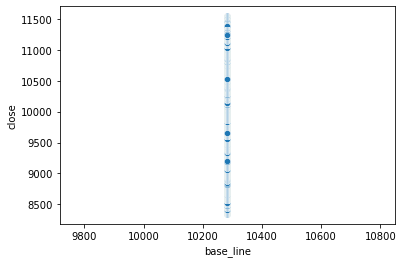

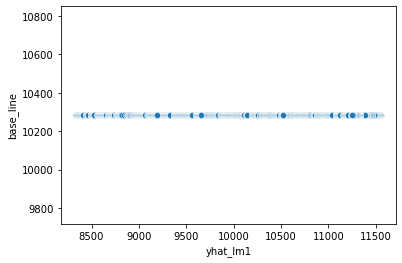

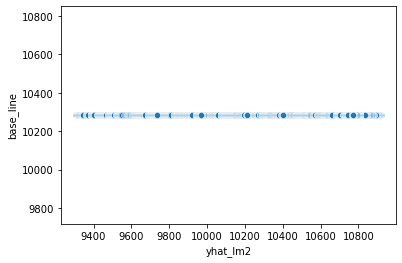

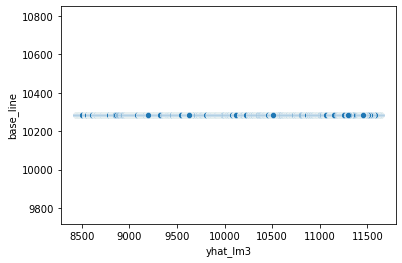

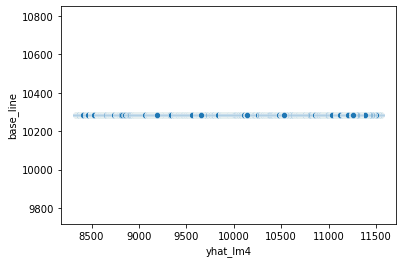

<AxesSubplot:xlabel='yhat_lm5', ylabel='base_line'>

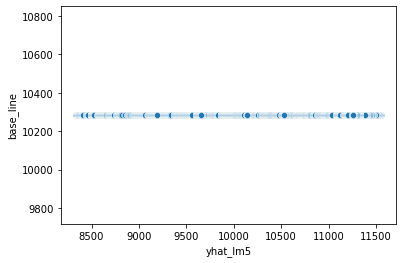

In [91]:
sns.scatterplot(data= y_train, y='close', x='base_line')
plt.show()
sns.scatterplot(data= y_train, y='base_line', x='yhat_lm1')
plt.show()
sns.scatterplot(data= y_train, y='base_line', x='yhat_lm2')
plt.show()
sns.scatterplot(data= y_train, y='base_line', x='yhat_lm3')
plt.show()
sns.scatterplot(data= y_train, y='base_line', x='yhat_lm4')
plt.show()
sns.scatterplot(data= y_train, y='base_line', x='yhat_lm5')


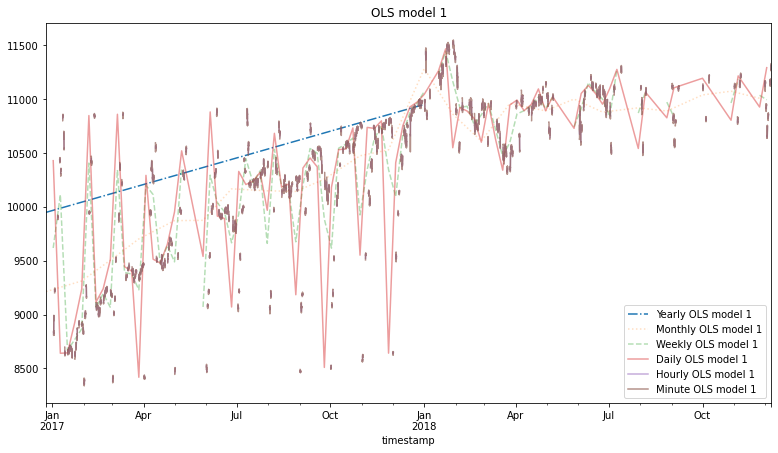

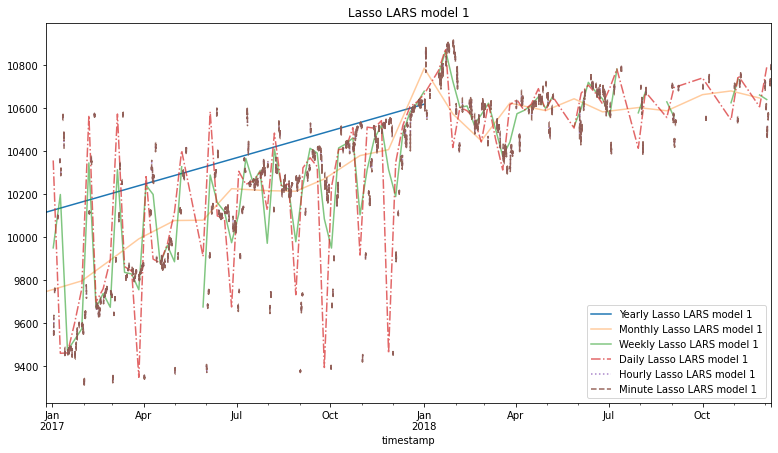

In [87]:
plt.figure(figsize=(13,7))
y_train.resample('Y').yhat_lm1.mean().plot(label='Yearly OLS model 1', ls= '-.')
y_train.resample('M').yhat_lm1.mean().plot(alpha=.25, label='Monthly OLS model 1', ls=':')
y_train.resample('W').yhat_lm1.mean().plot(alpha=.35, label='Weekly OLS model 1', ls='--')
y_train.resample('D').yhat_lm1.mean().plot(alpha=.45, label='Daily OLS model 1')
y_train.resample('H').yhat_lm1.mean().plot(alpha=.55, label='Hourly OLS model 1')
y_train.resample('T').yhat_lm1.mean().plot(alpha=.65, label='Minute OLS model 1')
plt.title('OLS model 1')
plt.legend()

plt.show()

plt.figure(figsize=(13,7))
y_train.resample('Y').yhat_lm2.mean().plot(label='Yearly Lasso LARS model 1')
y_train.resample('M').yhat_lm2.mean().plot(alpha=.4, label='Monthly Lasso LARS model 1')
y_train.resample('W').yhat_lm2.mean().plot(alpha=.6, label='Weekly Lasso LARS model 1')
y_train.resample('D').yhat_lm2.mean().plot(alpha=.7, label='Daily Lasso LARS model 1', ls='-.')
y_train.resample('H').yhat_lm2.mean().plot(alpha=.8, label='Hourly Lasso LARS model 1', ls=':')
y_train.resample('T').yhat_lm2.mean().plot(alpha=.9, label='Minute Lasso LARS model 1', ls='--')
plt.title('Lasso LARS model 1')
plt.legend()

plt.show()



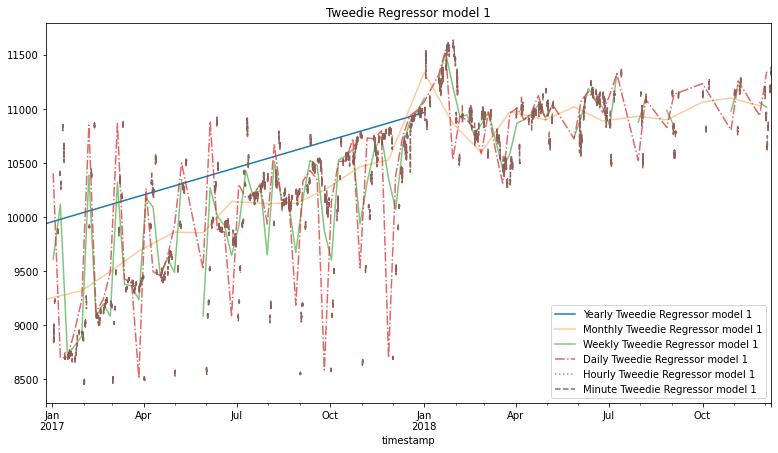

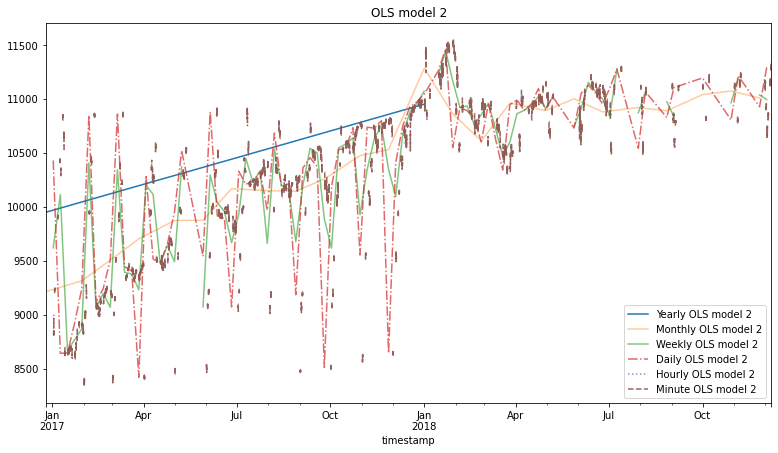

In [89]:
plt.figure(figsize=(13,7))
y_train.resample('Y').yhat_lm3.mean().plot(label='Yearly Tweedie Regressor model 1')
y_train.resample('M').yhat_lm3.mean().plot(alpha=.4, label='Monthly Tweedie Regressor model 1')
y_train.resample('W').yhat_lm3.mean().plot(alpha=.6, label='Weekly Tweedie Regressor model 1')
y_train.resample('D').yhat_lm3.mean().plot(alpha=.7, label='Daily Tweedie Regressor model 1', ls='-.')
y_train.resample('H').yhat_lm3.mean().plot(alpha=.8, label='Hourly Tweedie Regressor model 1', ls=':')
y_train.resample('T').yhat_lm3.mean().plot(alpha=.9, label='Minute Tweedie Regressor model 1', ls='--')
plt.title('Tweedie Regressor model 1')
plt.legend()

plt.show()

plt.figure(figsize=(13,7))
y_train.resample('Y').yhat_lm4.mean().plot(label='Yearly OLS model 2')
y_train.resample('M').yhat_lm4.mean().plot(alpha=.4, label='Monthly OLS model 2')
y_train.resample('W').yhat_lm4.mean().plot(alpha=.6, label='Weekly OLS model 2')
y_train.resample('D').yhat_lm4.mean().plot(alpha=.7, label='Daily OLS model 2', ls='-.')
y_train.resample('H').yhat_lm4.mean().plot(alpha=.8, label='Hourly OLS model 2', ls=':')
y_train.resample('T').yhat_lm4.mean().plot(alpha=.9, label='Minute OLS model 2', ls='--')
plt.title('OLS model 2')
plt.legend()

In [92]:
y_train.head()

,close,base_line,yhat_lm1,yhat_lm2,yhat_lm3,yhat_lm4,yhat_lm5
timestamp,,,,,,,
2017-02-01 09:07:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:08:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:09:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:10:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377
2017-02-01 09:11:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377


In [98]:
y_train['lm1_delta'] = abs(y_train.close - y_train.yhat_lm1)
y_train['lm2_delta'] = abs(y_train.close - y_train.yhat_lm2)
y_train['lm3_delta'] = abs(y_train.close - y_train.yhat_lm3)
y_train['lm4_delta'] = abs(y_train.close - y_train.yhat_lm4)
y_train['lm5_delta'] = abs(y_train.close - y_train.yhat_lm5)
y_train['bl_delta'] = abs(y_train.base_line - y_train.close)

y_train.head()

,close,base_line,yhat_lm1,yhat_lm2,yhat_lm3,yhat_lm4,yhat_lm5,lm1_delta,lm2_delta,lm3_delta,lm4_delta,lm5_delta,bl_delta
timestamp,,,,,,,,,,,,,
2017-02-01 09:07:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377,0.007725,934.311704,92.965207,0.041569,0.0377,1873.83762
2017-02-01 09:08:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377,0.007725,934.311704,92.965207,0.041569,0.0377,1873.83762
2017-02-01 09:09:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377,0.007725,934.311704,92.965207,0.041569,0.0377,1873.83762
2017-02-01 09:10:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377,0.007725,934.311704,92.965207,0.041569,0.0377,1873.83762
2017-02-01 09:11:59,8409.6,10283.43762,8409.607725,9343.911704,8502.565207,8409.641569,8409.6377,0.007725,934.311704,92.965207,0.041569,0.0377,1873.83762


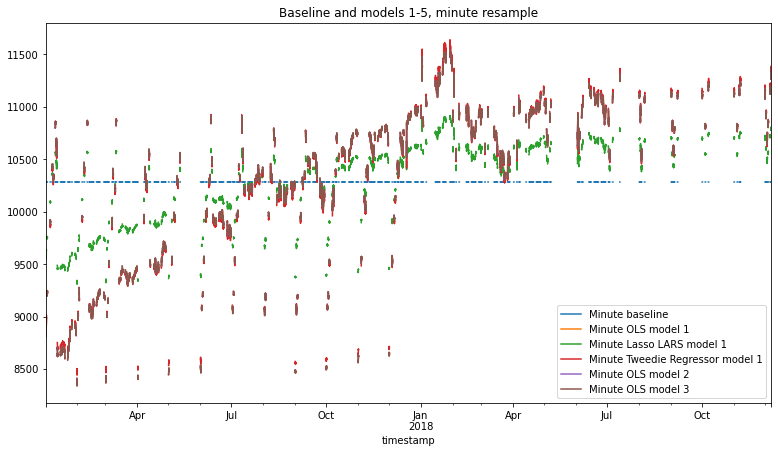

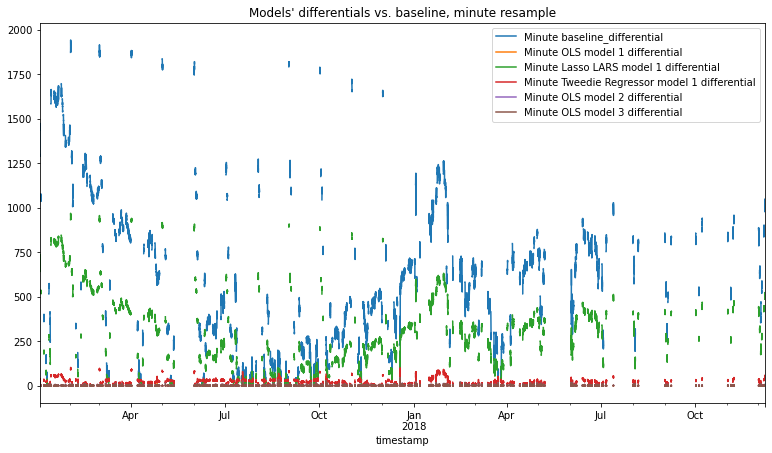

In [99]:
plt.figure(figsize=(13,7))

y_train.resample('T').base_line.mean().plot(label='Minute baseline')
y_train.resample('T').yhat_lm1.mean().plot(label='Minute OLS model 1')
y_train.resample('T').yhat_lm2.mean().plot(label='Minute Lasso LARS model 1')
y_train.resample('T').yhat_lm3.mean().plot(label='Minute Tweedie Regressor model 1')
y_train.resample('T').yhat_lm4.mean().plot(label='Minute OLS model 2')
y_train.resample('T').yhat_lm5.mean().plot(label='Minute OLS model 3')
plt.title('Baseline and models 1-5, minute resample')
plt.legend()

plt.show()





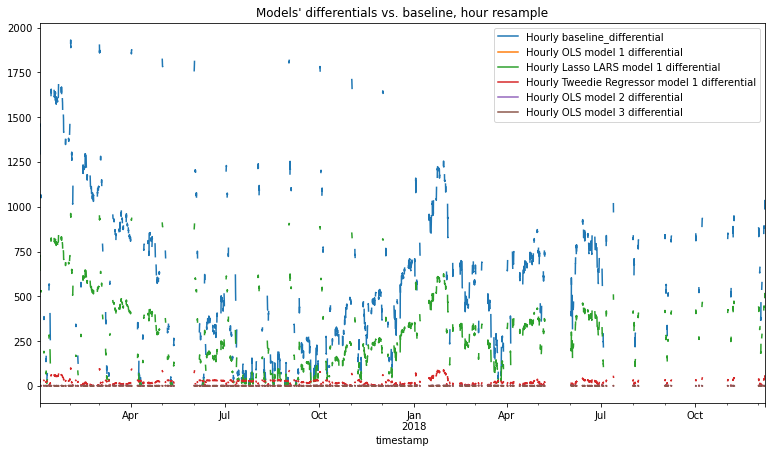

In [100]:
plt.figure(figsize=(13,7))
y_train.resample('T').bl_delta.mean().plot(label='Minute baseline delta')
y_train.resample('T').lm1_delta.mean().plot(label='Minute OLS model 1 delta')
y_train.resample('T').lm2_delta.mean().plot(label='Minute Lasso LARS model 1 delta')
y_train.resample('T').lm3_delta.mean().plot(label='Minute Tweedie Regressor model 1 delta')
y_train.resample('T').lm4_delta.mean().plot(label='Minute OLS model 2 delta')
y_train.resample('T').lm5_delta.mean().plot(label='Minute OLS model 3 delta')
plt.title('Models\' deltas vs. baseline, minute resample')
plt.legend()
plt.figure(figsize=(13,7))
y_train.resample('H').bl_delta.mean().plot(label='Hourly baseline delta')
y_train.resample('H').lm1_delta.mean().plot(label='Hourly OLS model 1 delta')
y_train.resample('H').lm2_delta.mean().plot(label='Hourly Lasso LARS model 1 delta')
y_train.resample('H').lm3_delta.mean().plot(label='Hourly Tweedie Regressor model 1 delta')
y_train.resample('H').lm4_delta.mean().plot(label='Hourly OLS model 2 delta')
y_train.resample('H').lm5_delta.mean().plot(label='Hourly OLS model 3 delta')
plt.title('Models\' deltas vs. baseline, hour resample')
plt.legend()
plt.figure(figsize=(13,7))
y_train.resample('D').bl_delta.mean().plot(label='Daily baseline delta')
y_train.resample('D').lm1_delta.mean().plot(label='Daily OLS model 1 delta')
y_train.resample('D').lm2_delta.mean().plot(label='Daily Lasso LARS model 1 delta')
y_train.resample('D').lm3_delta.mean().plot(label='Daily Tweedie Regressor model 1 delta')
y_train.resample('D').lm4_delta.mean().plot(label='Daily OLS model 2 delta')
y_train.resample('D').lm5_delta.mean().plot(label='Daily OLS model 3 delta')
plt.title('Models\' deltas vs. baseline, day resample')
plt.legend()
plt.figure(figsize=(13,7))
y_train.resample('W').bl_delta.mean().plot(label='Weekly baseline delta')
y_train.resample('W').lm1_delta.mean().plot(label='Weekly OLS model 1 delta')
y_train.resample('W').lm2_delta.mean().plot(label='Weekly Lasso LARS model 1 delta')
y_train.resample('W').lm3_delta.mean().plot(label='Weekly Tweedie Regressor model 1 delta')
y_train.resample('W').lm4_delta.mean().plot(label='Weekly OLS model 2 delta')
y_train.resample('W').lm5_delta.mean().plot(label='Weekly OLS model 3 delta')
plt.title('Models\' deltas vs. baseline, week resample')
plt.legend()
plt.figure(figsize=(13,7))
y_train.resample('M').bl_delta.mean().plot(label='Monthly baseline delta')
y_train.resample('M').lm1_delta.mean().plot(label='Monthly OLS model 1 delta')
y_train.resample('M').lm2_delta.mean().plot(label='Monthly Lasso LARS model 1 delta')
y_train.resample('M').lm3_delta.mean().plot(label='Monthly Tweedie Regressor model 1 delta')
y_train.resample('M').lm4_delta.mean().plot(label='Monthly OLS model 2 delta')
y_train.resample('M').lm5_delta.mean().plot(label='Monthly OLS model 3 delta')
plt.title('Models\' differentials vs. baseline, month resample')
plt.legend()
plt.figure(figsize=(13,7))
y_train.resample('Y').bl_delta.mean().plot(label='Yearly baseline delta')
y_train.resample('Y').lm1_delta.mean().plot(label='Yearly OLS model 1 delta')
y_train.resample('Y').lm2_delta.mean().plot(label='Yearly Lasso LARS model 1 delta')
y_train.resample('Y').lm3_delta.mean().plot(label='Yearly Tweedie Regressor model 1 delta')
y_train.resample('Y').lm4_delta.mean().plot(label='Yearly OLS model 2 delta')
y_train.resample('Y').lm5_delta.mean().plot(label='Yearly OLS model 3 delta')
plt.title('Models\' deltas vs. baseline, year resample')
plt.legend()

In [105]:
y_train.describe()

,close,base_line,yhat_lm1,yhat_lm2,yhat_lm3,yhat_lm4,yhat_lm5,lm1_delta,lm2_delta,lm3_delta,lm4_delta,lm5_delta,bl_delta
count,138284.000000,1.382840e+05,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000,138284.000000
mean,10283.437620,1.028344e+04,10283.437189,10283.437620,10283.437590,10283.438103,10283.437620,0.621442,303.595718,22.931589,0.908763,0.908715,608.866949
std,745.791282,2.711214e-08,745.790786,373.923106,746.352906,745.789648,745.790025,0.749639,214.746036,17.710924,1.024738,1.024784,430.677366
min,8339.900000,1.028344e+04,8338.062247,9308.388744,8440.697019,8338.651487,8338.650263,0.000022,0.004170,0.000626,0.000022,0.000002,0.037620
25%,9905.187500,1.028344e+04,9904.979856,10093.710653,9874.339670,9905.027220,9905.025641,0.166970,137.920070,10.897114,0.240550,0.240382,276.637620
50%,10474.475000,1.028344e+04,10474.485960,10379.172864,10453.129276,10474.413694,10474.410759,0.440257,279.262746,20.121155,0.639333,0.639071,559.962380
75%,10865.050000,1.028344e+04,10864.895140,10574.994124,10869.482318,10864.901731,10864.901715,0.834397,419.802354,29.936390,1.224339,1.224399,841.862380
max,11548.450000,1.028344e+04,11549.856077,10916.824279,11637.990412,11546.594847,11546.596080,54.741624,969.796625,103.784291,46.439768,46.441075,1943.537620


In [107]:
nifty_list = pd.read_csv('ind_nifty100list.csv')

nifty_list

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
1,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
2,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
3,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
4,Adani Transmission Ltd.,Power,ADANITRANS,EQ,INE931S01010
5,Ambuja Cements Ltd.,Construction Materials,AMBUJACEM,EQ,INE079A01024
6,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024
7,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026
8,Avenue Supermarts Ltd.,Consumer Services,DMART,EQ,INE192R01011
9,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034


In [108]:
print(nifty_list['Company Name'])

0                                              ACC Ltd.
1                                Adani Enterprises Ltd.
2                               Adani Green Energy Ltd.
3            Adani Ports and Special Economic Zone Ltd.
4                               Adani Transmission Ltd.
5                                   Ambuja Cements Ltd.
6                      Apollo Hospitals Enterprise Ltd.
7                                     Asian Paints Ltd.
8                                Avenue Supermarts Ltd.
9                                        Axis Bank Ltd.
10                                      Bajaj Auto Ltd.
11                                   Bajaj Finance Ltd.
12                                   Bajaj Finserv Ltd.
13                     Bajaj Holdings & Investment Ltd.
14                                    Bandhan Bank Ltd.
15                                       Bank of Baroda
16                             Berger Paints India Ltd.
17                    Bharat Petroleum Corporati

In [109]:
nifty_list['Company Name'].to_clipboard()